In [56]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt

In [57]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
x,y = make_moons(n_samples=2000,noise=0.2,random_state=100)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)
print(x_train.shape,x_test.shape)


(1400, 2) (600, 2)


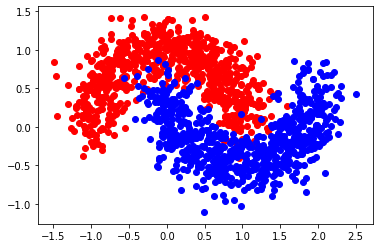

In [58]:
plt.scatter(x_train[y_train==0,0],x_train[y_train==0,1],color='red')
plt.scatter(x_train[y_train==1,0],x_train[y_train==1,1],color='blue')
plt.show()

In [59]:
class Layer:
    def __init__(self,n_input,n_neurons,activation=None,weights=None,bias=None):
        self.weights = weights if weights  is not None else \
            np.random.randn(n_input,n_neurons)*np.sqrt(1/n_neurons)
        self.bias = bias if bias is not None else np.random.rand(n_neurons)*0.1
        self.activation = activation
        self.last_activation = None
        self.error = 0.0
        self.delta = 0.0
    '''实现前向传播函数,经激活函数激活后输出'''
    def activate(self,x):
        r = np.dot(x,self.weights)+self.bias
        self.last_activation = self._apply_activation(r)
        return self.last_activation
    '''计算激活函数的输出'''
    def _apply_activation(self,r):
        if self.activation is None:
            return r
        elif self.activation == 'relu':
            return np.maximum(r,0)
        elif self.activation == 'tanh':
            return np.tanh(r)
        elif self.activation == 'sigmoid':
            return 1/(1+np.exp(-r))
        return r
    '''计算激活函数的导数的值'''
    def apply_activation_derivative(self,r):
        if self.activation is None:
            return np.ones_like(r)
        elif self.activation == 'relu':
            grad = np.array(r,copy=True)
            grad[r>0] = 1
            grad[r<0] = 0
            return grad
        elif self.activation == 'tanh':
            return 1-r**2
        elif self.activation == 'sigmoid':
            return r*(1-r)      
        return r

In [60]:
class NeuralNetwork:
    def __init__(self):
        self._layers = []
    
    def add_layer(self,layer):
        self._layers.append(layer)
    
    def feed_forward(self,x):
        for layer in self._layers:
            x = layer.activate(x)
        return x
    def backpropagation(self,x,y,learning_rate):
        output = self.feed_forward(x)
        for i in reversed(range(len(self._layers))):
            layer = self._layers[i]
            '''最后一层,delta即为每层的梯度'''
            if layer == self._layers[-1]:
                layer.error = y-output
                layer.delta = layer.error * layer.apply_activation_derivative(output)
            else:
                next_layer = self._layers[i+1]
                layer.error = np.dot(next_layer.weights,next_layer.delta)
                layer.delta = layer.error*layer.apply_activation_derivative(layer.last_activation)
            for i in range(len(self._layers)):
                layer = self._layers[i]
                o_i = np.atleast_2d(x if i==0 else self._layers[i-1].last_activation)
                # 更新权重 为什么要乘以上一层的输出，因为乘了上一层的权重才是正正的梯度
                layer.weights += layer.delta*o_i.T*learning_rate
    def train(self,x_train,x_test,y_train,y_test,learning_rate,max_epochs):
        y_onehot = np.zeros((y_train.shape[0],2))
        y_onehot[np.arange(y_train.shape[0]),y_train] = 1
        print("y_onehot_shape:..."+str(y_onehot.shape))
        print("y_train_shape:..."+str(y_train.shape))
        mses = []
        for i in range(max_epochs):
            for j in range(len(x_train)):
                self.backpropagation(x_train[j],y_onehot[j],learning_rate)
            if i%10 ==0:
                mse = np.mean(np.square(y_onehot-self.feed_forward(x_train)))
                mses.append(mse)
                print('Epoch: #%s, MSE:%f'%(i,float(mse)))
                i+=1
                # print('Accuracy: %.2f%%'%(self.accuracy(self.predict(x_test),y_test.flatten))*1000)
        return mses

In [61]:
nn = NeuralNetwork()
nn.add_layer(Layer(2,25,'sigmoid'))
nn.add_layer(Layer(25,50,'sigmoid'))
nn.add_layer(Layer(50,25,'sigmoid'))
nn.add_layer(Layer(25,2,'sigmoid'))

In [62]:
nn.train(x_train,x_test,y_train,y_test,learning_rate=0.001,max_epochs=200)



y_onehot_shape:...(1400, 2)
y_train_shape:...(1400,)
Epoch: #0, MSE:0.249986
Epoch: #10, MSE:0.244058
Epoch: #20, MSE:0.234879
Epoch: #30, MSE:0.215104
Epoch: #40, MSE:0.174278
Epoch: #50, MSE:0.133701
Epoch: #60, MSE:0.115380
Epoch: #70, MSE:0.106497
Epoch: #80, MSE:0.101457
Epoch: #90, MSE:0.098689
Epoch: #100, MSE:0.097273
Epoch: #110, MSE:0.096581
Epoch: #120, MSE:0.096251
Epoch: #130, MSE:0.096099
Epoch: #140, MSE:0.096034
Epoch: #150, MSE:0.096010
Epoch: #160, MSE:0.096005
Epoch: #170, MSE:0.096008
Epoch: #180, MSE:0.096013
Epoch: #190, MSE:0.096018


[0.24998567960839535,
 0.24405844793916173,
 0.2348792967310937,
 0.2151036938218836,
 0.1742782768464651,
 0.13370065442069537,
 0.11537971572081797,
 0.10649740914248884,
 0.10145681590447928,
 0.09868850643896246,
 0.09727253083172814,
 0.09658060392367138,
 0.09625122268711014,
 0.09609933033111234,
 0.09603379583028529,
 0.09600970893954602,
 0.09600470710954698,
 0.0960076090012296,
 0.09601288926287016,
 0.0960179260688065]